In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [72]:
file_path = 'impressions_one_hour.csv'
all_impressions_one_hour = pd.read_csv(file_path)
all_impressions_one_hour

,Unnamed: 0,log_entry_time,impression_id,partner_id,campaign_id,ad_group_id,private_contract_id,audience_id,creative_id,ad_format,...,device_make,device_model,rendering_context,carrier_id,temperature_in_celsius_name,temperature_bucket_start_in_celsius_name,temperature_bucket_end_in_celsius_name,impression_placement_id,file_date,advertiser_id
0,0,2020-09-09 04:29:56.000,57f3aa7a-b276-47f7-a289-c78177691746,wsc5r0j,5txgufo,nudgj9z,NaN,8jx7gvs,4rpiqbve,320x50,...,Xiaomi,Redmi S2,InApp,577.0,NaN,NaN,NaN,6a801e6f532e4aecb12316cbb04ebd30,2020-09-09,3ysyqec
1,1,2020-09-09 04:32:03.000,2ecfdbff-b25a-446f-af7c-ffd62baefb02,wsc5r0j,wwvbnz8,y7xgocb,NaN,lzyn28h,mqxamjr3,320x50,...,Samsung,SM-J500M,InApp,503.0,NaN,NaN,NaN,6a801e6f532e4aecb12316cbb04ebd30,2020-09-09,3ysyqec
2,2,2020-09-09 04:33:43.000,b6e82c65-2521-45fe-94d5-6c9d37060e84,wsc5r0j,vh2uh6e,8z30tgg,NaN,8w2jhha,dfmquuj0,300x50,...,Apple,iPhone,InApp,407.0,NaN,NaN,NaN,c1db878176df4e508d777a27c3412bb1,2020-09-09,3ysyqec
3,3,2020-09-09 04:30:48.000,9d26efa9-0cef-48d6-9619-4e73ce0a4829,wsc5r0j,vh2uh6e,8z30tgg,NaN,8w2jhha,x8c7u827,320x50,...,Apple,iPhone,InApp,NaN,NaN,NaN,NaN,NaN,2020-09-09,3ysyqec
4,4,2020-09-09 04:31:46.000,364a7c77-96ef-473c-9675-5e8ad2a0dbc1,wsc5r0j,f6l0r6n,3l27ron,NaN,8jx7gvs,w4jiczfi,300x50,...,Samsung,SM-G970F,InApp,NaN,NaN,NaN,NaN,NaN,2020-09-09,3ysyqec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466478,466478,2020-09-09 04:16:11.000,2fa02f7a-5496-4cdb-9d82-c182918c66f9,wsc5r0j,r4jrfrr,je76ygx,NaN,qiyblnv,kbh6oziz,300x250,...,Apple,iPhone,InApp,NaN,NaN,NaN,NaN,106332,2020-09-09,3ysyqec
466479,466479,2020-09-09 04:16:21.000,c05dc607-2674-4c9a-a6d0-92e9c5a32f85,wsc5r0j,r4jrfrr,je76ygx,NaN,qiyblnv,u93fsb2z,320x50,...,Apple,iPhone,InApp,NaN,NaN,NaN,NaN,39467,2020-09-09,3ysyqec
466480,466480,2020-09-09 04:16:33.000,f9aa68ac-64d9-4aac-9902-f888e3fe0839,wsc5r0j,r4jrfrr,je76ygx,NaN,qiyblnv,u93fsb2z,320x50,...,Apple,iPad,InApp,NaN,34.50,30.0,38.0,78386,2020-09-09,3ysyqec
466481,466481,2020-09-09 04:16:46.000,b9c75a4a-6f97-4c80-ad92-c727b379f2b2,wsc5r0j,r4jrfrr,je76ygx,NaN,qiyblnv,kbh6oziz,300x250,...,Apple,iPhone,InApp,NaN,33.49,30.0,38.0,113796,2020-09-09,3ysyqec


In [88]:
## Data Cleaning
data_clean = all_impressions_one_hour.drop(columns=['Unnamed: 0', 'log_entry_time', 'partner_id', 
                                                             'private_contract_id', 'creative_id', 'ad_format',
                                                             'frequency', 'supply_vendor_publisher_id', 'deal_id',
                                                             'site', 'referrer_categories_list', 'fold_position',
                                                             'user_hour_of_week', 'ip_address', 'td_id', 'metro', 
                                                             'recency', 'language_code', 'media_cost', 
                                                             'fee_feature_cost', 'data_usage_total_cost', 
                                                             'ttd_cost_in_usd', 'partner_cost_in_usd', 
                                                             'advertiser_cost_in_usd', 'device_id', 
                                                             'processed_time', 'rendering_context', 
                                                             'temperature_in_celsius_name', 
                                                             'temperature_bucket_start_in_celsius_name', 
                                                             'temperature_bucket_end_in_celsius_name', 
                                                             'impression_placement_id', 'file_date', 
                                                             'advertiser_id', 'carrier_id', 'impression_id'])
data_clean = data_clean.dropna()
data_clean = data_clean.drop_duplicates()
data_clean.reset_index(drop=True, inplace=True)
data_clean.head()

,campaign_id,ad_group_id,audience_id,supply_vendor,user_agent,country,region,city,device_type,os_family,os,browser,latitude,longitude,zip_code,device_make,device_model
0,5txgufo,nudgj9z,8jx7gvs,mopub,Mozilla/5.0 (Linux; Android 8.1.0; Redmi S2 Bu...,Spain,A Coruña,Sada,4,6,154,15,43.35,-8.25,15160,Xiaomi,Redmi S2
1,wwvbnz8,y7xgocb,lzyn28h,mopub,Mozilla/5.0 (Linux; Android 6.0.1; SM-J500M Bu...,Brazil,Santa Catarina,São Miguel do Oeste,4,6,136,15,-26.71,-53.51,89900,Samsung,SM-J500M
2,vh2uh6e,8z30tgg,8w2jhha,mopub,Mozilla/5.0 (iPhone; CPU iPhone OS 13_5_1 like...,France,Cote d'Or,Aiserey,4,5,168,15,47.17,5.16,21110,Apple,iPhone
3,vh2uh6e,8z30tgg,8w2jhha,google,Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like...,France,Seine-Maritime,Rouen,4,5,169,15,49.39,1.02,76000,Apple,iPhone
4,f6l0r6n,3l27ron,8jx7gvs,google,Mozilla/5.0 (Linux; Android 10; SM-G970F Build...,Germany,Bavaria,Seubersdorf,4,6,101,15,49.16,11.62,92358,Samsung,SM-G970F


In [74]:
# Select Japan's data
Japan_data = data_clean.copy()[data_clean['country'] == 'Japan']
Japan_data.reset_index(drop=True, inplace=True)
Japan_data.head()

,campaign_id,ad_group_id,audience_id,supply_vendor,user_agent,country,region,city,device_type,os_family,os,browser,latitude,longitude,zip_code,device_make,device_model
0,r4jrfrr,40bujbh,qiyblnv,inMobi Exchange,Mozilla/5.0 (iPhone; CPU iPhone OS 13_7 like M...,Japan,Tokyo,Tokyo,4,5,101,15,35.70,139.67,102-0082,Apple,iPhone
1,r4jrfrr,je76ygx,qiyblnv,mopub,Mozilla/5.0 (iPhone; CPU iPhone OS 13_5_1 like...,Japan,Saitama,Konosu,4,5,168,15,36.06,139.53,365-0031,Apple,iPhone
2,r4jrfrr,je76ygx,qiyblnv,smaato,SmaatoBillNoticeSender,Japan,Tokyo,Machida,4,5,157,15,35.73,139.48,194-0001,Apple,iPhone
3,r4jrfrr,je76ygx,qiyblnv,smaato,SmaatoBillNoticeSender,Japan,Aichi,Nagoya,4,5,169,15,35.05,136.96,460-0001,Apple,iPhone
4,r4jrfrr,40bujbh,qiyblnv,mopub,Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like...,Japan,Hyōgo,Kakogawa,4,5,169,15,34.77,134.82,675-0051,Apple,iPhone


In [81]:
Japan_data = Japan_data.drop(columns = ['country'])
Japan_data.head()

,campaign_id,ad_group_id,audience_id,supply_vendor,user_agent,region,city,device_type,os_family,os,browser,latitude,longitude,zip_code,device_make,device_model
0,r4jrfrr,40bujbh,qiyblnv,inMobi Exchange,Mozilla/5.0 (iPhone; CPU iPhone OS 13_7 like M...,Tokyo,Tokyo,4,5,101,15,35.70,139.67,102-0082,Apple,iPhone
1,r4jrfrr,je76ygx,qiyblnv,mopub,Mozilla/5.0 (iPhone; CPU iPhone OS 13_5_1 like...,Saitama,Konosu,4,5,168,15,36.06,139.53,365-0031,Apple,iPhone
2,r4jrfrr,je76ygx,qiyblnv,smaato,SmaatoBillNoticeSender,Tokyo,Machida,4,5,157,15,35.73,139.48,194-0001,Apple,iPhone
3,r4jrfrr,je76ygx,qiyblnv,smaato,SmaatoBillNoticeSender,Aichi,Nagoya,4,5,169,15,35.05,136.96,460-0001,Apple,iPhone
4,r4jrfrr,40bujbh,qiyblnv,mopub,Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like...,Hyōgo,Kakogawa,4,5,169,15,34.77,134.82,675-0051,Apple,iPhone


In [43]:
## Data Exploration

In [82]:
# Features/Variable names
Japan_data.columns

Index(['campaign_id', 'ad_group_id', 'audience_id', 'supply_vendor',
       'user_agent', 'region', 'city', 'device_type', 'os_family', 'os',
       'browser', 'latitude', 'longitude', 'zip_code', 'device_make',
       'device_model'],
      dtype='object')

In [83]:
# General data statistics
Japan_data.describe()

,device_type,os_family,os,browser,latitude,longitude
count,26179.000000,26179.000000,26179.000000,26179.000000,26179.000000,26179.000000
mean,3.938195,5.062722,158.011498,14.112266,35.379124,136.659276
std,0.240806,0.242467,22.101148,2.540219,2.939100,11.313557
min,3.000000,5.000000,101.000000,1.000000,-33.860000,-97.820000
25%,4.000000,5.000000,158.000000,15.000000,34.710000,135.520000
50%,4.000000,5.000000,169.000000,15.000000,35.600000,139.450000
75%,4.000000,5.000000,169.000000,15.000000,35.740000,139.710000
max,4.000000,6.000000,169.000000,15.000000,45.400000,151.190000


In [84]:
# Data Frame information (null, data type etc)
Japan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26179 entries, 0 to 26178
Data columns (total 16 columns):
campaign_id      26179 non-null object
ad_group_id      26179 non-null object
audience_id      26179 non-null object
supply_vendor    26179 non-null object
user_agent       26179 non-null object
region           26179 non-null object
city             26179 non-null object
device_type      26179 non-null int64
os_family        26179 non-null int64
os               26179 non-null int64
browser          26179 non-null int64
latitude         26179 non-null float64
longitude        26179 non-null float64
zip_code         26179 non-null object
device_make      26179 non-null object
device_model     26179 non-null object
dtypes: float64(2), int64(4), object(10)
memory usage: 3.2+ MB


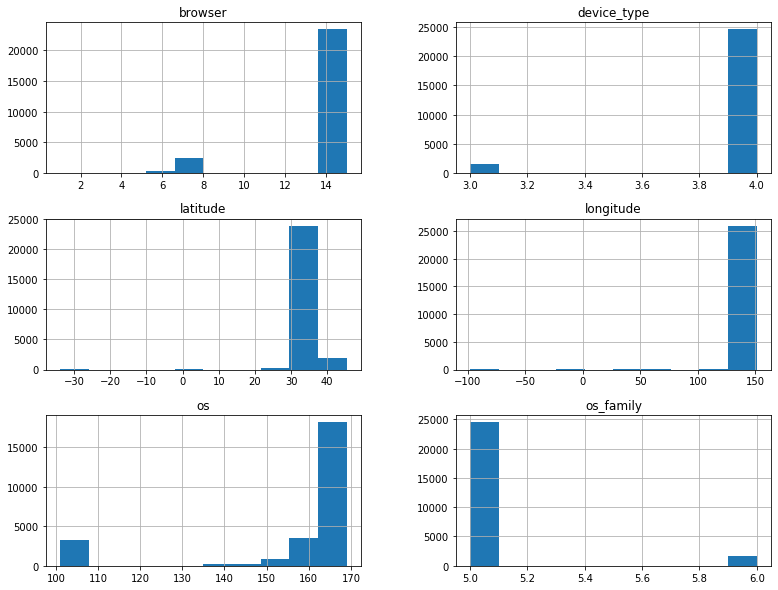

In [47]:
# Histograms
Japan_data.hist(figsize=(13,10))
plt.show()

In [97]:
# campaign
print(Japan_data['campaign_id'].value_counts())
# ad group
print(Japan_data['ad_group_id'].value_counts())
# audience
print(Japan_data['audience_id'].value_counts())

r4jrfrr    26179
Name: campaign_id, dtype: int64
je76ygx    19395
40bujbh     5142
yb20axt      883
f6m9407      759
Name: ad_group_id, dtype: int64
qiyblnv    26179
Name: audience_id, dtype: int64


In [86]:
# supply vendor
print(Japan_data['supply_vendor'].value_counts())

adgeneration                   12505
mopub                           5208
smaato                          4056
inMobi Exchange                 1426
fluct                           1115
pubmatic                         831
rubicon                          472
ONE Mobile                       107
Index Exchange                   100
appnexus                          73
aja                               70
ironsource                        67
kakao                             62
AdColony                          51
openx                             25
yieldmo                            7
Brightroll Exchange Display        3
yieldone                           1
Name: supply_vendor, dtype: int64


In [87]:
# user agent
print(Japan_data['user_agent'].value_counts())

Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148                                                             8145
SmaatoBillNoticeSender                                                                                                                                                      4056
Mozilla/5.0 (iPhone; CPU iPhone OS 13_7 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148                                                               1352
Mozilla/5.0 (iPhone; CPU iPhone OS 13_5_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148                                                             1283
Mozilla/5.0 (iPhone; CPU iPhone OS 13_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148                                                                985
                                                                                                                   

In [89]:
# region
Japan_data['city'].value_counts()

Osaka               1591
Yokohama             789
Suginami-ku          784
Setagaya-ku          667
Nagoya               650
                    ... 
Miyamae                1
Yabuki                 1
Oikama                 1
Shimata-honmachi       1
Kyokoji                1
Name: city, Length: 1349, dtype: int64

In [33]:
# city
Japan_data['city'].value_counts()

Osaka            3010
Setagaya-ku      2281
Suginami-ku      2075
Nerima           1551
Shibuya          1377
                 ... 
Bungo-ono           1
Yudomari            1
Kimobetsu           1
Katahiramachi       1
Funagura            1
Name: city, Length: 1349, dtype: int64

In [ ]:
# city and region are different?

In [90]:
# os family
Japan_data['os_family'].value_counts()

5    24537
6     1642
Name: os_family, dtype: int64

In [91]:
# os
Japan_data['os'].value_counts()

169    15676
101     3242
168     2002
157     1394
161      880
158      864
163      469
151      293
153      208
145      197
159      181
155      162
160      152
139      111
152       99
140       95
154       76
150       75
164        3
Name: os, dtype: int64

In [92]:
# browser
Japan_data['browser'].value_counts()

15    23324
7      2460
6       394
1         1
Name: browser, dtype: int64

In [96]:
#latitude
print(Japan_data['latitude'].value_counts())
#longitude
print(Japan_data['longitude'].value_counts())
# They are geographic coordination

35.69    942
35.68    831
35.70    795
35.64    716
34.68    658
        ... 
37.07      1
37.19      1
33.04      1
42.84      1
42.52      1
Name: latitude, Length: 947, dtype: int64
139.70    1030
139.64     834
139.71     634
139.65     566
139.67     554
          ... 
141.97       1
142.83       1
130.27       1
142.50       1
133.33       1
Name: longitude, Length: 1240, dtype: int64


In [95]:
#zip code
Japan_data['zip_code'].value_counts()

154-0017    435
160-0021    381
176-0001    315
102-0082    278
153-0061    252
           ... 
746-0001      1
939-8131      1
930-0941      1
857-0821      1
915-0821      1
Name: zip_code, Length: 5739, dtype: int64

In [34]:
# device model
Japan_data['device_model'].value_counts()

iPhone        40056
iPad           1740
iPod Touch       99
SH-01K           44
iPhone 8         42
              ...  
1806              1
S1                1
LGT32             1
SM-A750GN         1
SM-G970F          1
Name: device_model, Length: 378, dtype: int64

In [67]:
# device type
Japan_data['device_type'].value_counts()

4    24561
3     1618
Name: device_type, dtype: int64